In [70]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [71]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return data

In [72]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

('Dimensions: ', (100, 3))
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


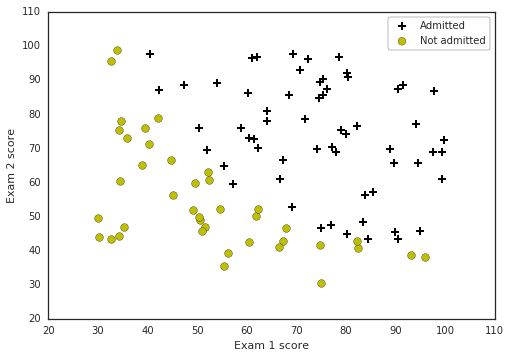

In [73]:
data = loaddata('ex2data1.txt', ',')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')



## Logistic regression

$h_{\theta}(x) = g(\theta^{T}x)$

$g(z)=\frac{1}{1+e^{−z}}$

In [74]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

cost function 
$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$

vectorization form
$J(\theta) = \frac{1}{m}\big(-y^T(\,log\,(g(X\theta))-(1-y^T)(\,log\,(1-g(X\theta))\big)$


In [75]:
#
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    
    J = (-1.0/m) * (y.T.dot(np.log(h))+(1-y.T).dot(np.log(1-h)))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

partial derivative
$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}$

vectorized form
$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$


In [76]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad =(1.0/m)*X.T.dot(h-y)
    return(grad.flatten())

In [77]:
#feed the data into numpy matrix 
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print 'Cost: \n', cost
print 'Grad: \n', grad
print X.shape

Cost: 
[ 0.69314718]
Grad: 
[ -0.1        -12.00921659 -11.26284221]
(100, 3)


cost function optimization

In [78]:
res = minimize(costFunction, initial_theta.reshape(-1, 1), args=(X,y), method=None, jac=gradient, options={'maxiter':400})
print res
print initial_theta.reshape(-1, 1)

      fun: 0.2034977015894407
 hess_inv: array([[  3.24739469e+03,  -2.59380769e+01,  -2.63469561e+01],
       [ -2.59380769e+01,   2.21449124e-01,   1.97772068e-01],
       [ -2.63469561e+01,   1.97772068e-01,   2.29018831e-01]])
      jac: array([ -2.73305295e-10,   1.43144028e-07,  -1.58965802e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 23
     njev: 28
   status: 0
  success: True
        x: array([-25.16133401,   0.20623172,   0.2014716 ])
[[ 0.]
 [ 0.]
 [ 0.]]


In [79]:
# do the prediction here
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta)) >= threshold
    return(p.astype('int'))
x1 = np.array([1, 45, 85])
theta1 = res.x.reshape(-1,1)
#print sigmoid(x1.dot(theta1))
# print x1.dot()
print predict(theta1, x1)

[1]


In [80]:
p = predict(res.x.reshape(-1,1), X) 
a=sum(p==y)*1.0/p.size*100
print'Train accuracy {}%'.format(a[0])

Train accuracy 89.0%


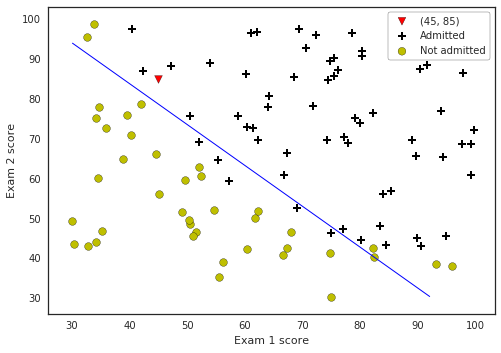

In [81]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

Regularized logistic regression

In [82]:
data2 = loaddata('ex2data2.txt', ',')

('Dimensions: ', (118, 3))
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


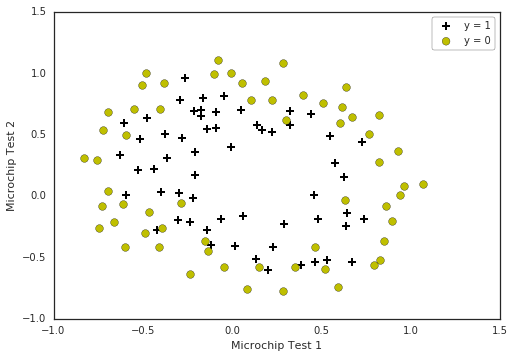

In [83]:
y = np.c_[data2[:,2]]
X = data2[:,0:2]
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [84]:
#use sklean package to get more features for x1, x2, x1x2, x1x2**2, ect...
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])

new equations: 
$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$

vectorized: 
$J(\theta) = \frac{1}{m}\big(-y^T(\,log\,(g(X\theta))-(1-y^T)(\,log\,(1-g(X\theta))\big)+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$

partial derivative: 
$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$

$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$

In [112]:
def costFunctionReg(theta,XX, y):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1, 1)))
    J = (-1.0/m) * (y.T.dot(np.log(h))+(1-y.T).dot(np.log(1-h))) + (1.0/(2*m))*np.sum(np.square(theta[1:]))
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradientReg(theta, XX, y):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1.0/m)*XX.T.dot(h-y) + (1.0/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

initial_theta = np.zeros(XX.shape[1])
gradientReg(initial_theta, XX, y)
res = minimize(costFunctionReg, initial_theta.reshape(-1, 1), args=(XX,y), method=None, jac=gradientReg, options={'maxiter':3000})

accuracy = 100.0*sum(predict(res.x.reshape(-1,1), XX) == y)/y.size   
print accuracy[0]

83.0508474576


In [99]:
# fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

# for i, C in enumerate([0, 1, 100]):
#     # Optimize costFunctionReg
#     res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
#     # Accuracy
#     accuracy = 100*sum(predict(res2.x.reshape(-1,1), XX) == y)/y.size    

#     # Scatter plot of X,y
#     plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
#     # Plot decisionboundary
#     x1_min, x1_max = X[:,0].min(), X[:,0].max(),
#     x2_min, x2_max = X[:,1].min(), X[:,1].max(),
#     xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
#     h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x.reshape(-1, 1)))
#     h = h.reshape(xx1.shape)
#     axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
#     axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))
res2 = minimize(costFunctionReg, initial_theta, args=(XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
print res2

ValueError: operands could not be broadcast together with shapes (118,28) (28,1) 